# Keras

In [1]:
%matplotlib inline
%env KERAS_BACKEND=tensorflow

# 標準數據分析、畫圖套件
import numpy as np
import matplotlib.pyplot as plt

# 神經網路方面
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

# 互動設計用
from ipywidgets import interact_manual

env: KERAS_BACKEND=tensorflow


Using TensorFlow backend.


# 2. 讀入 MNIST 數據庫
## 2.1 由 Keras 讀入 MNIST

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
print(f'訓練資料總筆數為 {len(x_train)} 筆資料')
print(f'測試資料總筆數為 {len(x_test)} 筆資料')

訓練資料總筆數為 60000 筆資料
測試資料總筆數為 10000 筆資料


In [4]:
X = [[3, 12], [5, 8], [23, 12], [5, 2]]

In [5]:
X[0]

[3, 12]

In [6]:
# 矩陣
X = [[[3, 12], [5, 8]], [[23, 12], [5, 2]]]

In [7]:
X[0]

[[3, 12], [5, 8]]

## 2.2 數據庫的內容

In [8]:
def show_xy(n=0):
    ax = plt.gca()
    X = x_train[n]
    plt.xticks([], [])
    plt.yticks([], [])
    plt.imshow(X.reshape(28,28), cmap = 'Greys')
    print(f'本資料 y 給定的答案為: {y_train[n]}')

In [9]:
interact_manual(show_xy, n=(0,59999));

interactive(children=(IntSlider(value=0, description='n', max=59999), Button(description='Run Interact', style…

In [10]:
n = 37688
X = x_train[n]

In [11]:
X

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [12]:
X.shape

(28, 28)

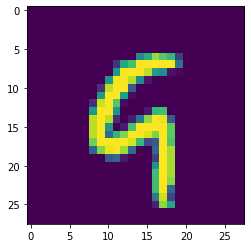

In [13]:
plt.imshow(X)

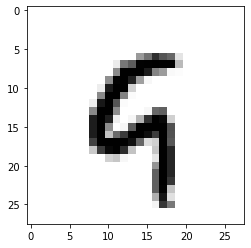

In [14]:
plt.imshow(X, cmap = "Greys")

In [15]:
y_train[n]

9

## 2.3 輸入格式整理

In [16]:
x_train.shape

(60000, 28, 28)

In [17]:
x_test.shape

(10000, 28, 28)

In [18]:
x_train = x_train/255
x_test = x_test/255

In [19]:
x_train[n]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## 2.4 輸出格式整理
* 1 -> [0, 1, 0, 0, 0, 0, 0, 0, 0]
* 5 -> [0, 0, 0, 0, 0, 1, 0, 0, 0]

In [20]:
# 拉平套件
from keras.utils import np_utils

In [21]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [22]:
n = 37688
y_train[n]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

# 3. 打造第一個神經網路
## 3.1 決定神經網路架構、讀入相關套件
假如我們要這麼做:

* 使用 3 個 hidden layers
* Hidden layer 1 用 <span style="color:red;">6</span> 個神經元
* Hidden layer 2 用 <span style="color:red;">28</span> 個神經元
* Hidden layer 3 用 <span style="color:red;">2</span> 個神經元

* Activation Function 唯一指名 <span style="color:red;">relu</span>

於是從 Keras 把相關套件讀進來。

In [37]:
from keras.models import Sequential
# 拉平
from keras.layers import Dense, Flatten
from keras.optimizers import SGD

In [38]:
# 開一台空白的學習機
model = Sequential()

In [39]:
#第一層神經元 攤平
model.add(Flatten(input_shape = (28, 28)))

In [40]:
# Dense全連結 hidden
#第一層神經元 輸出6 輸入28*28
model.add(Dense(6, input_dim = 784, activation = 'relu'))

In [41]:
#第二層神經元
model.add(Dense(45, activation = 'relu'))

In [42]:
#第三層神經元
model.add(Dense(50, activation = 'relu'))

In [43]:
#第四層神經元 輸出固定為0-9
model.add(Dense(10, activation = 'softmax'))

In [44]:
# 組裝 取loss方法
# model.compile(loss='mse', 改learning rate optimizer=SGD(lr=0.087), 監控正確率metrics=['accuracy'])
model.compile(loss='mse', optimizer=SGD(lr=0.087), metrics=['accuracy'])

In [45]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 4710      
_________________________________________________________________
dense_6 (Dense)              (None, 45)                315       
_________________________________________________________________
dense_7 (Dense)              (None, 50)                2300      
_________________________________________________________________
dense_8 (Dense)              (None, 10)                510       
Total params: 7,835
Trainable params: 7,835
Non-trainable params: 0
_________________________________________________________________


In [46]:
# w + bias
a = 784*6 + 6
b = 6*28 + 28
c = 28*2 + 2
d = 2*10 + 10
print(a, b, c, d)

4710 196 58 30


In [47]:
# 比對 看正確率
model.fit(x_train, y_train, batch_size=100, epochs=20)

Epoch 1/20
60000/60000 [==============================] - 2s 28us/step - loss: 0.0896 - accuracy: 0.1493
Epoch 2/20
60000/60000 [==============================] - 1s 15us/step - loss: 0.0860 - accuracy: 0.2658
Epoch 3/20
60000/60000 [==============================] - 1s 16us/step - loss: 0.0753 - accuracy: 0.3007
Epoch 4/20
60000/60000 [==============================] - 1s 15us/step - loss: 0.0631 - accuracy: 0.4666
Epoch 5/20
60000/60000 [==============================] - 1s 15us/step - loss: 0.0529 - accuracy: 0.5645
Epoch 6/20
60000/60000 [==============================] - 1s 15us/step - loss: 0.0441 - accuracy: 0.6870
Epoch 7/20
60000/60000 [==============================] - 1s 16us/step - loss: 0.0353 - accuracy: 0.7632
Epoch 8/20
60000/60000 [==============================] - 1s 15us/step - loss: 0.0287 - accuracy: 0.8133
Epoch 9/20
60000/60000 [==============================] - 1s 16us/step - loss: 0.0245 - accuracy: 0.8418
Epoch 10/20
60000/60000 [==============================

# 6. 試用我們的結果

In [48]:
from ipywidgets import interact_manual

In [49]:
predict = model.predict_classes(x_test)

In [50]:
predict

array([7, 2, 1, ..., 4, 5, 6])

In [51]:
def test(測試編號):
    plt.imshow(x_test[測試編號].reshape(28,28), cmap='Greys')
    print('神經網路判斷為:', predict[測試編號])

神經網路判斷為: 6


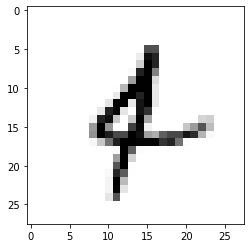

In [53]:
test(300)

In [54]:
interact_manual(test, 測試編號=(0, 9999))

interactive(children=(IntSlider(value=4999, description='測試編號', max=9999), Button(description='Run Interact', …

<function __main__.test(測試編號)>

In [55]:
score = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 23us/step


In [56]:
print('loss:', score[0])
print('正確率', score[1])

loss: 0.015362379001453519
正確率 0.8988999724388123


In [57]:
model_json = model.to_json()
open('stupid_model.json', 'w').write(model_json)
model.save_weights('stupid_model_weights.h5')